
# Diseño de software para cómputo científico

----

## Unidad 3: HDF5


### Agenda de la Unidad 3
---

#### Clase 1
- Lectura y escritura de archivos.
- Persistencia de binarios en Python (pickle).
- Archivos INI/CFG, CSV, JSON, XML y YAML

#### Clase 2
- Bases de datos relacionales y SQL.

### Clase 3

- Breve repaso de bases de datos No relacionales.
- **Formato HDF5.**

## Hierarchical Data Format  5 (HDF5) 

- El formato HDF5 está diseñado para abordar algunas de las limitaciones de la biblioteca HDF4 y para satisfacer los requisitos actuales y anticipados de los sistemas y aplicaciones modernos.
- HDF5 simplifica la estructura de archivos para incluir solo dos tipos principales de objetos:
    - **Datasets**, que son matrices multidimensionales de tipo homogéneo
    - **Groups**, que son estructuras de contenedor que pueden contener conjuntos de datos y otros grupos
- Es formato de datos verdaderamente jerárquico similar a un sistema de archivos. 
- Se puede acceder a los recursos en un archivo HDF5 utilizando la sintaxis '/ruta/a/recurso' similar a POSIX. - Soporta metadatos. 
- Las API de almacenamiento más complejas que representan imágenes y tablas se pueden construir utilizando conjuntos de datos, grupos y atributos.


## HDF5 - Críticas


- Es monolítico y su especificación es muy larga
- HDF5 no exige el uso de UTF-8, por lo que las aplicaciones del cliente pueden esperar ASCII en la mayoría de los lugares.
- Los datos de un dataset no se pueden liberar del disco sin generar una copia de archivo utilizando una herramienta externa (*h5repack*)

## HDF5: un sistema de archivos en un archivo


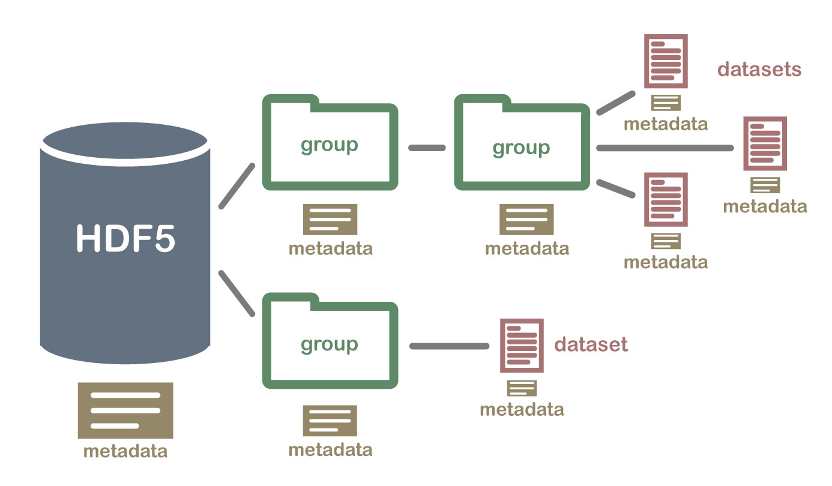

Trabajar con grupos y miembros de grupos es similar a trabajar con directorios y archivos en UNIX.

- `/` grupo raíz (cada archivo HDF5 tiene un grupo raíz)
- `/foo` miembro del grupo raíz llamado foo
- `/foo/bar` miembro del grupo foo llamado bar

## HDF5 en el stack científico de Python

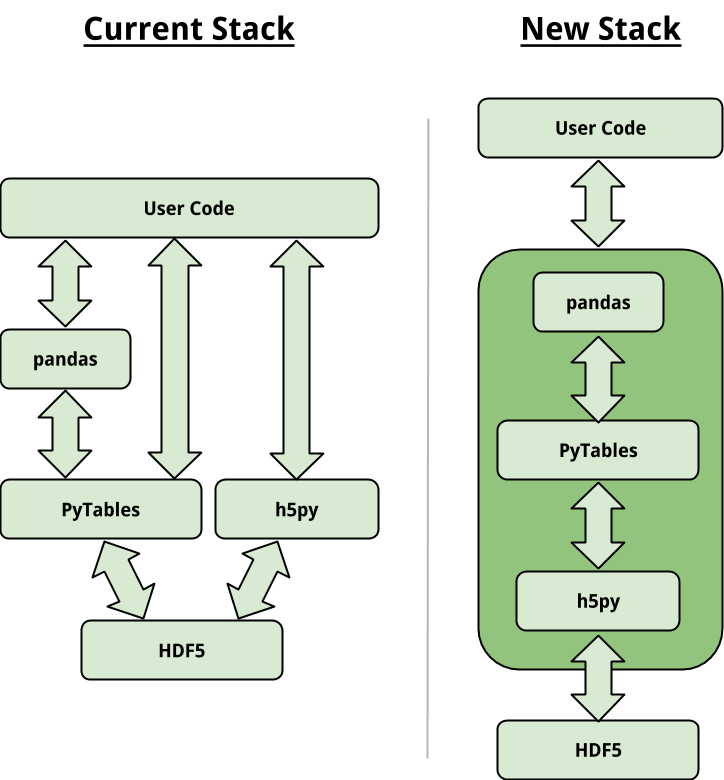

## Pandas + HDF5

In [1]:
!rm hdf5/ -rf
!mkdir hdf5

In [2]:
import numpy as np
import pandas as pd  # pip install tables

hdf = pd.HDFStore('hdf5/storage.h5')
hdf.info()

"<class 'pandas.io.pytables.HDFStore'>\nFile path: hdf5/storage.h5\nEmpty"

In [3]:
df = pd.DataFrame(np.random.rand(5,3), columns=('A','B','C'))# put the dataset in the storage

hdf.put('d1', df, format='table', data_columns=True)

In [4]:
hdf['d1'].shape

(5, 3)

In [5]:
hdf.append('d1', pd.DataFrame(np.random.rand(5,3), 
           columns=('A','B','C')), 
           format='table', data_columns=True)
hdf.close()  # closes the file

## Pandas + HDF5

Hay muchas formas de abrir un almacenamiento hdf5, podríamos usar nuevamente el constructor de la clase `HDFStorage`, pero la función `read_hdf()` también nos permite consultar los datos:

In [6]:
# this query selects the columns A and B# where the values of A is greather than 0.5
df = pd.read_hdf('hdf5/storage.h5','d1',where=['A>.5'], columns=['A','B'])
df

,A,B
1,0.639666,0.856072
3,0.611977,0.629943
0,0.615323,0.624752
1,0.579083,0.588663
2,0.941246,0.948493
3,0.922869,0.080986


## Pandas + HDF5

- En este punto, tenemos un almacenamiento que contiene un único conjunto de datos. 
- La estructura del almacenamiento se puede organizar mediante grupos. 
- En el siguiente ejemplo, agregamos tres conjuntos de datos diferentes al archivo hdf5, dos en el mismo grupo y otro en uno diferente:

In [7]:
hdf = pd.HDFStore('hdf5/storage.h5')
hdf.put('tables/t1', pd.DataFrame(np.random.rand(20,5)))
hdf.put('tables/t2', pd.DataFrame(np.random.rand(10,3)))
hdf.put('new_tables/t1', pd.DataFrame(np.random.rand(15,2)), format="fixed")

In [8]:
print(hdf.info())
hdf.close()

<class 'pandas.io.pytables.HDFStore'>
File path: hdf5/storage.h5
/d1                       frame_table  (typ->appendable,nrows->10,ncols->3,indexers->[index],dc->[A,B,C])
/new_tables/t1            frame        (shape->[15,2])                                                   
/tables/t1                frame        (shape->[20,5])                                                   
/tables/t2                frame        (shape->[10,3])                                                   


## HDF5 Command line tools

Re comendable instalar 

```bash
$ sudo apt install hdf5-tools
...
$ 
h52gif h5debug h5dump h5jam h5mkgrp h5redeploy h5repart h5unjam 
h5copy h5diff h5import h5ls h5perf_serial h5repack h5stat
```

Documentación: https://support.hdfgroup.org/products/hdf5_tools/#h5dist

## HDF5 Command line tools

### List content

In [15]:
!h5ls  hdf5/storage.h5/d1/_i_table

A                        Group
B                        Group
C                        Group
index                    Group


### Copy

In [16]:
!h5copy -i hdf5/storage.h5 -s tables/t1 -o hdf5/out.h5 -d copy

HDF5-DIAG: Error detected in HDF5 (1.10.0-patch1) thread 140261002439552:
  #000: ../../../src/H5Ocopy.c line 240 in H5Ocopy(): destination object already exists
    major: Object header
    minor: Object already exists
Error in copy...Exiting


In [17]:
!h5ls hdf5/out.h5

copy                     Group


## HDF5 Command line tools

### Stats

In [12]:
!h5stat hdf5/storage.h5

Filename: hdf5/storage.h5
File information
	# of unique groups: 12
	# of unique datasets: 53
	# of unique named datatypes: 0
	# of unique links: 0
	# of unique other: 0
	Max. # of links to object: 1
	Max. # of objects in group: 10
File space information for file metadata (in bytes):
	Superblock: 96
	Superblock extension: 0
	User block: 0
	Object headers: (total/unused)
		Groups: 7304/0
		Datasets(exclude compact data): 25136/232
		Datatypes: 0/0
	Groups:
		B-tree/List: 11776
		Heap: 1792
	Attributes:
		B-tree/List: 0
		Heap: 0
	Chunked datasets:
		Index: 18864
	Datasets:
		Heap: 0
	Shared Messages:
		Header: 0
		B-tree/List: 0
		Heap: 0
	Free-space managers:
		Header: 0
		Amount of free space: 0
Small groups (with 0 to 9 links):
	# of groups with 1 link(s): 1
	# of groups with 2 link(s): 2
	# of groups with 3 link(s): 1
	# of groups with 4 link(s): 4
	Total # of small groups: 8
Group bins:
	# of groups with 1 - 9 links: 8
	# of groups with 10 - 99 links: 4
	Total # of groups: 12
Datase

## GUI tool

- La mejor herramienta es vitables (`pip install ViTables`).
- Instalenla con la misma version de h5py y pytables que usaron para crear los archivos.

In [18]:
!vitables hdf5/storage.h5


(python3.7:3536): Gtk-WARNING **: 08:44:12.070: Theme parsing error: gtk-widgets.css:186:14: not a number

(python3.7:3536): Gtk-WARNING **: 08:44:12.070: Theme parsing error: gtk-widgets.css:186:14: Expected a string.

(python3.7:3536): Gtk-WARNING **: 08:44:12.072: Theme parsing error: gtk-widgets.css:2749:24: not a number

(python3.7:3536): Gtk-WARNING **: 08:44:12.072: Theme parsing error: gtk-widgets.css:2749:24: Expected a string.

(python3.7:3536): Gtk-WARNING **: 08:44:12.072: Theme parsing error: gtk-widgets.css:2940:14: not a number

(python3.7:3536): Gtk-WARNING **: 08:44:12.072: Theme parsing error: gtk-widgets.css:2940:14: Expected a string.

(python3.7:3536): Gtk-WARNING **: 08:44:12.073: Theme parsing error: gtk-widgets.css:2946:17: Expected a string.

(python3.7:3536): Gtk-WARNING **: 08:44:12.074: Theme parsing error: gtk-widgets.css:4083:14: not a number

(python3.7:3536): Gtk-WARNING **: 08:44:12.074: Theme parsing error: gtk-widgets.css:4083:14: Expected a string.


## Referencias

- https://github.com/jackdbd/hdf5-pydata-munich"
- https://en.wikipedia.org/wiki/Hierarchical_Data_Format
- https://dzone.com/articles/quick-hdf5-pandas
